In [146]:
import numpy as np
import matplotlib.pylab as plt
from math import exp,log,sqrt,pi,sin
import scipy.stats as sts
import pandas as pd
import random
%matplotlib inline

In [357]:
def Cn(F0,X):
    n=len(X)
    X.sort()
    Fn = lambda x: ((1/n)*sum([1*(X[i]<=x) for i in range(n)]))
    return 1/(12*n) + sum([(F0(X[i])-(2*i-1)/(2*n))**2 for i in range(n)])

In [376]:
def An(F0,X):
    n=len(X)
    X.sort()
    Fn = lambda x: ((1/n)*sum([1*(X[i]<=x) for i in range(n)]))
    return -n-(1/n)*(sum([(2*i-1)*(log(F0(X[i]))+log(1-F0(X[n-i-1]))) for i in range(n)]))

In [352]:
def Dn(F0,X):
    n = len(X)
    X.sort()
    Fn = lambda x: ((1/n)*sum([1*(X[i]<=x) for i in range(n)]))
    plt.plot(np.linspace(min(X),max(X)),[F0(z) for z in np.linspace(min(X),max(X))])
    plt.step(X,[Fn(xi)for xi in X])
    return max([max(i/n-F0(X[i]),F0(X[i])-(i-1)/n) for i in range(n)])

In [227]:
def CS(X,F,name):
    n = len(X)
    Xi = sorted(X)
    Cn = []
    for i in range(n):
        Cn.append(1/(12*n) + sum([(F(Xi[i])-(2*i-1)/(2*n))**2 for i in range(n)]))
    C=max(Cn)
    S=np.argmax(Cn)
    return C

In [230]:
def ASS(X,F,name):
    n=len(X)
    Xi=sorted(X)
    An = []
    for i in range(n):
        An.append(-n-(1/n)*(sum([(2*i-1) for i in range(n)])))
    A=max(An)
    SS=np.argmax(An)
    return A

In [233]:
def KS(X,F,name):
    n = len(X)
    Xi = sorted(X)
    Dn = []
    for i in range(n):
        Dn.append(max((i+1)/n-F(Xi[i]),F(Xi[i])-i/n))
    D = max(Dn)
    K = np.argmax(Dn)
    return D

In [120]:
def M(F0,x):
    n=len(x)
    a=inf(x)
    b=sup(x)
    cot=30
    i=0
    xi=a+np.random.randint(1,3)*(b-a)
    yi=np.random.randint(1,3)*cot
    for i in range (n):
        if xi<=yi:
             Exitos=i+1
    Fn= lambda x:(exitos/n)*(a-b) 
    

In [222]:
def MC(x,y):
    a=min(x,y)
    b=max(x,y)
    cot=30
    i=0
    exitos=0
    xi=a+np.random.randint(1,3)*(b-a)
    yi=np.random.randint(1,3)*cot  
    return xi,yi
    

In [111]:
def diferencia(n):
    if n<=15:
        return 15-n
    else:
        return (15-n)*2

In [240]:
def BondadDAjuste(X,alpha):
    n=len(X)
    Fn = lambda y:len([x for x in X if x<=y])/n
    m = np.mean(X)
    v = np.var(X)
    inf = min(X)
    sup = max(X)
    a = m*((m*(1-m))/v-1)
    b = a*(1-m)/m
    b_ = m**2/v
    a_ = m/v
    display(pd.DataFrame([m,v,inf,sup,a,b,a_,b_],index=['$\mu$','$\sigma^2$','$\min$',
                                                        '$\max$','$\\alpha$','$\\beta$','$\\mu/\\sigma^{2}$',
                                                        '$\\mu^{2}/\\sigma^{2}$']).T)
    F = {'Normal':lambda x:sts.norm.cdf(x,m,v),
        'Exponencial':lambda x:sts.expon.cdf(x,0,m),
        'Uniforme':lambda x:sts.uniform.cdf(x,inf,sup),
        'Beta':lambda x:sts.beta.cdf(x,a,b),
        'Gamma':lambda x:sts.gamma.cdf(x,a_,0,b_)}
    t = np.arange(inf,sup+0.02,0.01)
    plt.figure(figsize=(16,9))
    Graficas = [plt.plot(t,F[x](t),label=x) for x in F.keys()]
    plt.step(t,list(map(Fn,t)),label='Empirica',lw=2,color='black')
    plt.title('Pruebas de bondad de ajuste')
    plt.legend()
    y=np.random.normal(0,1,3000)
    nCn=lambda l=1:sum((1/(j**2)(pi**2))*y for j in range(1,3000))
    nAn=lambda l=1:sum((1/(j**2)(pi**2))*y/(log(j)+log(1-j)) for j in range(1,3000))
    nDn =lambda l=1:1-2*sum(((-1)**(j-1))*exp(-2*(j**2)*(l**2)) for j in range(1,3000))
    Quant = lambda alpha:max(q for q in np.arange(0.01,4,0.01) if nDn(q)<alpha)
    Cnn = {x:CS(X,F[x],x) for x in F.keys()}
    Ann = {x:ASS(X,F[x],x)for x in F.keys()}
    KSs = {x:KS(X,F[x],x) for x in F.keys()}
    Calc = {x:[Ann[x],sqrt(n)*Ann[x],Cnn[x],sqrt(n)*Cnn[x],KSs[x],sqrt(n)*KSs[x],Quant(alpha),sqrt(n)*KSs[x]<=Quant(alpha)] for x in F.keys()}
    display(pd.DataFrame(Calc,index=['$A_n$','$\sqrt{n}A_n$','$C_n$','$\sqrt{n}C_n$','$D_n$','$\sqrt{n}D_n$','$q_{%s}$'%alpha,'$H_0$']).T)

,$\mu$,$\sigma^2$,$\min$,$\max$,$\alpha$,$\beta$,$\mu/\sigma^{2}$,$\mu^{2}/\sigma^{2}$
0,0.004883,0.794404,-2.494579,2.439744,-0.004853,-0.98903,0.006147,0.00003


,$A_n$,$\sqrt{n}A_n$,$C_n$,$\sqrt{n}C_n$,$D_n$,$\sqrt{n}D_n$,$q_{0.15}$,$H_0$
Normal,-198,-1980,0.046853,0.46853,0.0595231,0.595231,0.61,True
Exponencial,-198,-1980,8.35222,83.5222,0.499473,4.99473,0.61,False
Uniforme,-198,-1980,17.7517,177.517,0.574655,5.74655,0.61,False
Beta,-198,-1980,NaN,NaN,NaN,NaN,0.61,False
Gamma,-198,-1980,8.37333,83.7333,0.51,5.1,0.61,False


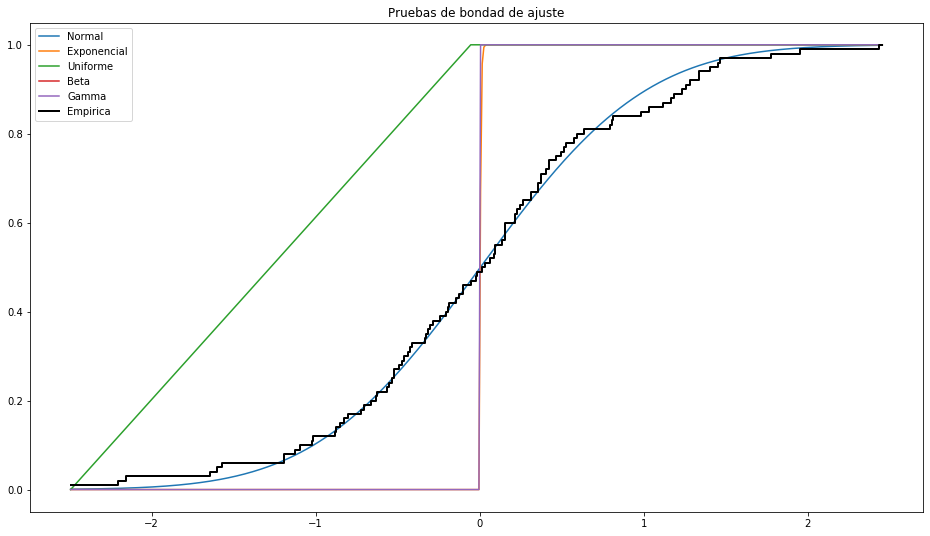

In [241]:
BondadDAjuste(np.random.normal(0,1,100),0.15)

In [169]:
np.random.normal(0,1,3)

array([ 0.79073296, -1.49429756, -0.91385532])